In [11]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\TemplateMatchin.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\template92-106.jpg",0)

In [6]:
#  to make the it (width then hight) in ordinary cases it is h then w
w , h = template.shape[::-1]

106


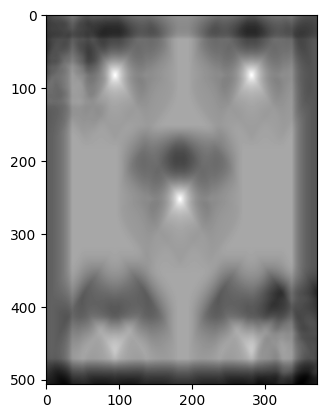

In [9]:
# cv2.TM_CCORR_NORMED  >>> the most used method
res = cv2.matchTemplate(gray_img,template,cv2.TM_CCORR_NORMED)
# the result causing a white point and this is the Starting point for our template in the image 
plt.imshow(res,'gray')
# print(res)

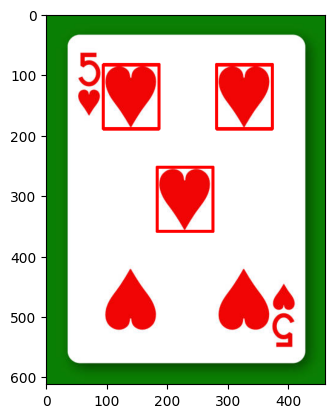

In [22]:
# in this case the starting point is white this means that we can make a thershold manages us to reach the startig point
treshold = 0.99
loc = np.where(res>=treshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,0,255),2)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)    

<b>Other methods for template matching</b>
<Br></Br>
<B>If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum Becouse the point will be black not White as usual </B> 


![Screenshot 2024-03-24 025503.png](<attachment:Screenshot 2024-03-24 025503.png>)
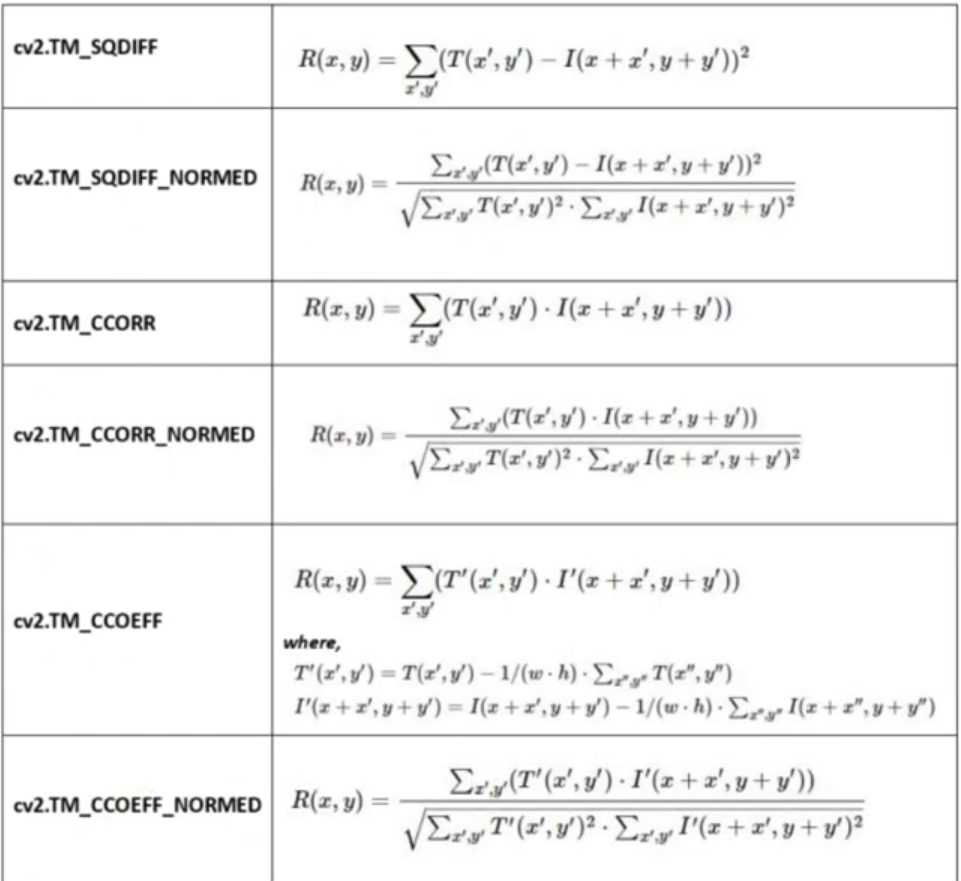

<B>By anthor Way<B>

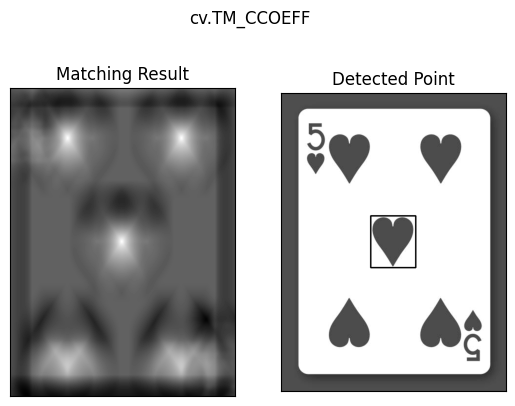

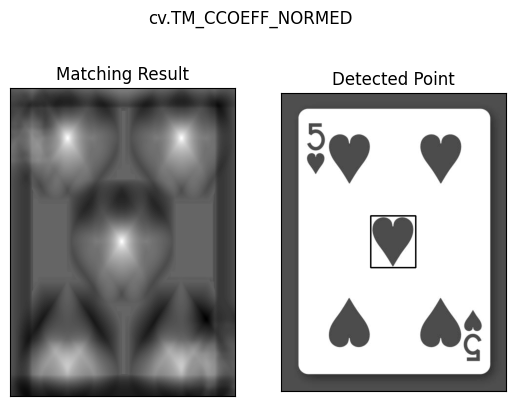

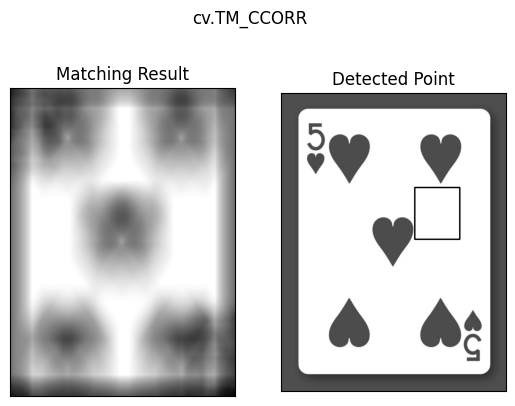

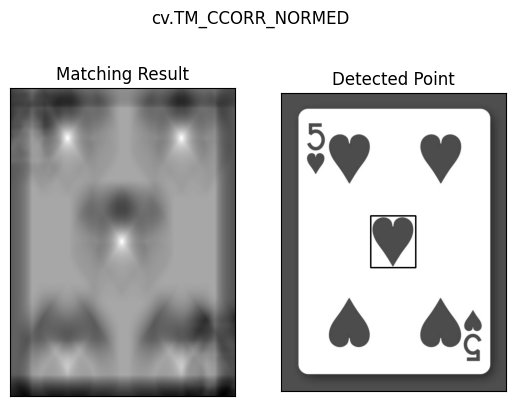

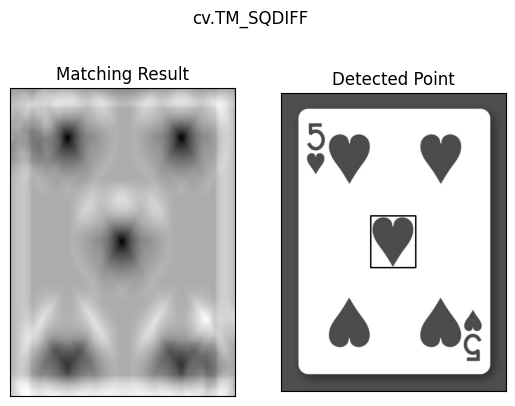

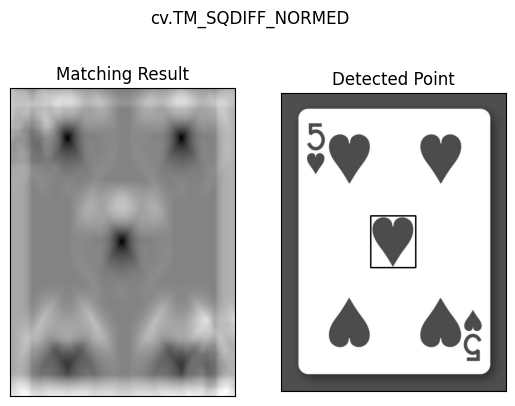

In [34]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\TemplateMatchin.jpg", cv.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\template92-106.jpg", cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img,top_left, bottom_right, (0,0,255), 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()